# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
stsa_train_file = '/content/drive/MyDrive/Sklearn Assignment/stsa-train.txt'
stsa_test_file = '/content/drive/MyDrive/Sklearn Assignment/stsa-test.txt'

In [5]:
import numpy as np
file = open(stsa_train_file, 'r')
lines = file.readlines()
train_data_x = []
train_data_y = []
for line in lines:
  feedback, dialogue = line.split(' ', 1)
  train_data_x.append(dialogue)
  train_data_y.append(feedback)
  
file = open(stsa_test_file, 'r')
lines = file.readlines()
test_data_x = []
test_data_y = []
for line in lines:
  feedback, dialogue = line.split(' ', 1)
  test_data_x.append(dialogue)
  test_data_y.append(feedback)

train_y = np.array([eval(i) for i in train_data_y])
test_y = np.array([eval(i) for i in test_data_y])

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer ()
train_x = vectorizer.fit_transform(train_data_x)
vocab = vectorizer.vocabulary_
vectorizer = TfidfVectorizer(vocabulary=vocab)
test_x = vectorizer.fit_transform(test_data_x)

In [6]:
def confusion(expected, actual):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(len(expected)):
    if (expected[i] < 0.5):
      expected[i] = 0
    else:
      expected[i] = 1
  print(expected)
  for a, b in zip(expected, actual):
    if a == 1 and b == 1:
      tp += 1
    if a == 0 and b == 0:
      tn += 1
    if a == 0 and b == 1:
      fp += 1
    if a == 1 and b == 0:
      fn += 1
  return [tp, tn, fp, fn]

def calc_accuracy(confusion_array):
  return (confusion_array[0] + confusion_array[1]) / np.sum(confusion_array)

def calc_precision(confusion_array):
  # TP / (TP + FP)
  return confusion_array[0] / (confusion_array[0] + confusion_array[2])

def calc_recall(confusion_array):
  # TP / (TP + FN)
  return confusion_array[0] / (confusion_array[0] + confusion_array[3])

def calc_f1score(precision, recall):
  return 2 * (precision * recall) / (precision + recall)

In [7]:
def train_10fold_cross_fold(clf):
  kf = KFold(n_splits=10)

  for train_index, test_index in kf.split(train_data_x):
    X_train, X_test = train_x[train_index], train_y[train_index]
    y_train, y_test = train_x[test_index], train_y[test_index]
    clf.fit(X_train, X_test)
  return clf

In [8]:
def print_metrics(clf):
  confusion_array = confusion(clf.predict(test_x), test_y)
  print(clf.predict(test_x))
  print(confusion_array)
  accuracy = calc_accuracy(confusion_array)
  precision = calc_precision(confusion_array)
  recall = calc_recall(confusion_array)
  f1score = calc_f1score(precision, recall)

  print("Accuracy: {}".format(accuracy))
  print("Precision: {}".format(precision))
  print("Recall: {}".format(recall))
  print("F1 Score: {}".format(f1score))
  print("")

In [9]:
# MultinominalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold

def multinominalNB():
  clf = MultinomialNB()
  print("MultinomialNB:")
  print_metrics(train_10fold_cross_fold(clf))

In [10]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import KFold

def svm():
  clf = SVC(kernel='linear')
  print("SVM:")
  print_metrics(train_10fold_cross_fold(clf))

In [11]:
# Decision tree
from sklearn import tree
from sklearn.model_selection import KFold

def decisionTree():
  clf = tree.DecisionTreeRegressor()
  print("Decision tree:")
  print_metrics(train_10fold_cross_fold(clf))

In [12]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

def randomForestClassifier():
  clf = RandomForestClassifier(max_depth=4, random_state=42)
  print("Random forest classifier:")
  print_metrics(train_10fold_cross_fold(clf))

In [13]:
# XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def xgBoost():
  clf = XGBRegressor(objective="reg:squarederror")
  print("XGBoost:")
  print_metrics(train_10fold_cross_fold(clf))

In [14]:
multinominalNB()
svm()
decisionTree()
randomForestClassifier()
xgBoost()

MultinomialNB:
[0 0 0 ... 1 0 1]
[0 0 0 ... 1 0 1]
[810, 669, 99, 243]
Accuracy: 0.8121911037891268
Precision: 0.8910891089108911
Recall: 0.7692307692307693
F1 Score: 0.8256880733944955

SVM:
[0 0 0 ... 1 0 1]
[0 0 0 ... 1 0 1]
[753, 720, 156, 192]
Accuracy: 0.8088962108731467
Precision: 0.8283828382838284
Recall: 0.7968253968253968
F1 Score: 0.8122977346278317

Decision tree:
[0. 0. 0. ... 0. 1. 1.]
[0. 0. 0. ... 0. 1. 1.]
[595, 528, 314, 384]
Accuracy: 0.6166941241076331
Precision: 0.6545654565456546
Recall: 0.6077630234933605
F1 Score: 0.6302966101694915

Random forest classifier:
[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]
[897, 61, 12, 851]
Accuracy: 0.5260845689181768
Precision: 0.9867986798679867
Recall: 0.5131578947368421
F1 Score: 0.6751975912683478

XGBoost:
[0. 0. 0. ... 0. 1. 1.]
[0.39848077 0.48213708 0.16598907 ... 0.48608533 0.6408894  0.5611265 ]
[754, 436, 155, 476]
Accuracy: 0.6534870950027457
Precision: 0.8294829482948295
Recall: 0.6130081300813008
F1 Score: 0.70500233754090

(20 points) The purpose of the question is to practice different machine 

1.   List item
2.   List item

learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [21]:
reviews_file = '/content/drive/MyDrive/Sklearn Assignment/Amazon_Unlocked_Mobile.csv'

In [22]:
#Write your code here.

import pandas as pd
data = pd.read_csv(reviews_file)
data = data.head(5000)

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualRating = data['Rating']
positiveNegative = actualRating.map(partition) 
data['Rating'] = positiveNegative

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') 
stop=set(stopwords.words('english'))



def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

i=0
str1=' '
final_string=[]
all_positive_words=[]
all_negative_words=[]
s=''
for sent in data['Reviews'].values:
    filtered_sentence=[]
    try:
      sent=cleanhtml(sent)
      for w in sent.split():
          for cleaned_words in cleanpunc(w).split():
              if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                  if(cleaned_words.lower() not in stop):
                      s=(sno.stem(cleaned_words.lower())).encode('utf8')
                      filtered_sentence.append(s)
                      if (data['Rating'].values)[i] == 'positive': 
                          all_positive_words.append(s)
                      if(data['Rating'].values)[i] == 'negative':
                          all_negative_words.append(s)
                  else:
                      continue
              else:
                  continue 
    except:
      filtered_sentence = []
    str1 = b" ".join(filtered_sentence)
    
    final_string.append(str1)
    i+=1

data['CleanedReview'] = final_string 
data['CleanedReview'] = data['CleanedReview'].str.decode("utf-8")

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data['CleanedReview'].values)

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', random_state=99)
model.fit(bow)

df = data
df['KMeans Label'] = model.labels_

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
i=0
list_of_sent=[]
for sent in data['CleanedReview'].values:
    list_of_sent.append(sent.split())

import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

i=0
list_of_sent_train=[]
for sent in data['CleanedReview'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

import numpy as np
sent_vectors = [];
for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words =0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [24]:
from sklearn.cluster import DBSCAN

def dbscan(sent_vectors):
  model = DBSCAN(eps = 0.15, min_samples = 20, n_jobs=-1)
  model.fit_predict(sent_vectors)
  return model.labels_

In [25]:
from sklearn.cluster import AgglomerativeClustering

def hierarchical(sent_vectors):
  cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
  agg = cluster.fit_predict(sent_vectors)
  return cluster.labels_

In [26]:
df['DBScan Labels'] = dbscan(sent_vectors)
df['Hierarchical Labels'] = hierarchical(sent_vectors)

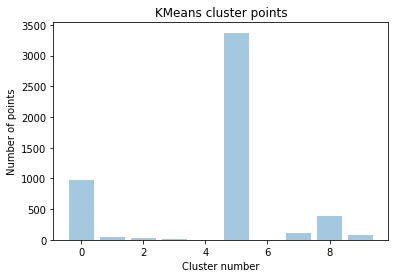

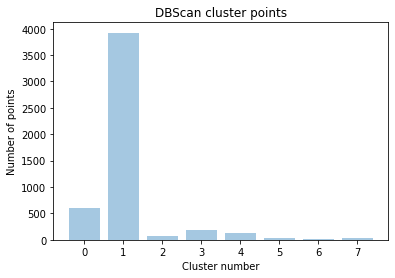

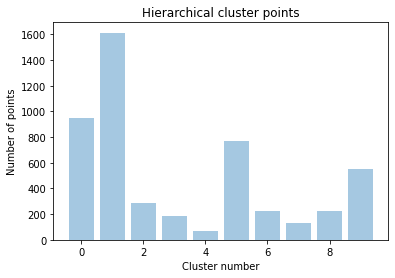

In [27]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['KMeans Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

plt.bar([x for x in range(8)], df.groupby(['DBScan Labels'])['Reviews'].count(), alpha = 0.4)
plt.title('DBScan cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

plt.bar([x for x in range(10)], df.groupby(['Hierarchical Labels'])['Reviews'].count(), alpha = 0.4)
plt.title('Hierarchical cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

If we compare all the above three algorithms, Hierarchical clustering performs better. 
It was able to separate items into various clusters while DBScan and KMeans assigned most of the items to one cluster and other clusters contains very less number of reviews